# <center> PROJETO DE UM GERADOR DE ONDA SENOIDAL </center>

##1 INTRODUÇÃO

###1.1 DADOS DO TRABALHO

**Disciplina**:Instrumentação Industrial I

**Unidade**:   Faculdade de Engenharia Elétrica

**Código**:    FEELT32503

**Matrícula**:

**Aluno**:

**Ano/Semestre**:   2022/02

**Observações**:

###1.2 MONTAGEM PROPOSTA



*   Item da lista

*   Item da lista
*   Item da lista


*   Item da lista



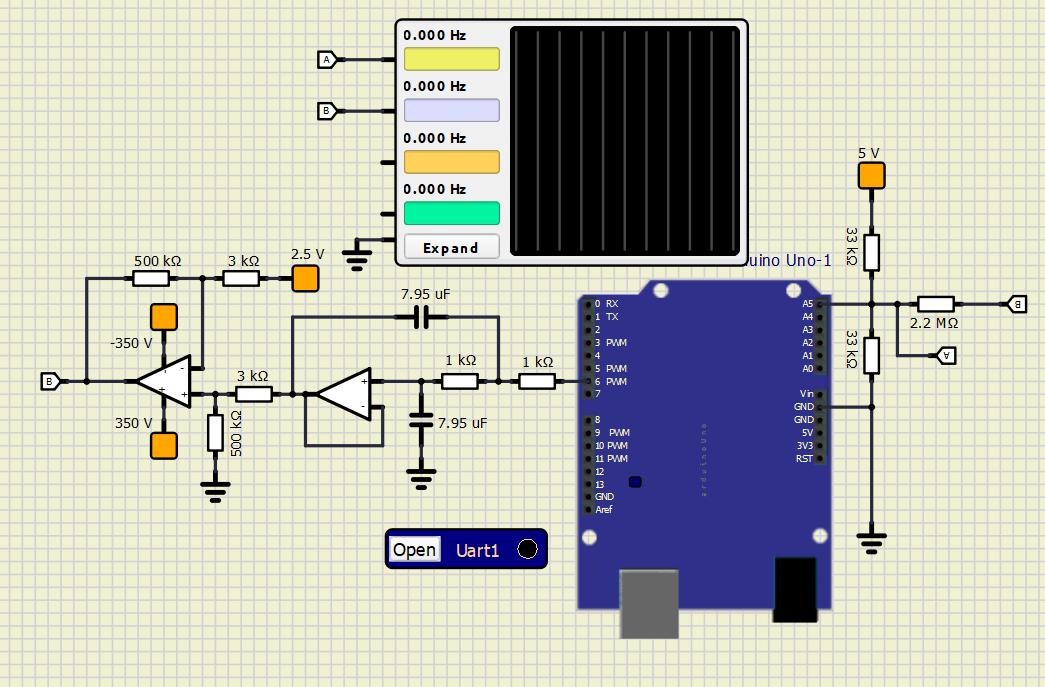

##2 FAIXA DE OPERAÇÃO

In [ ]:
import math
def geraPontoOperacao(matricula1,matricula2):
  valor = math.floor((int(matricula1[-2:])+int(matricula2[-2:]))/4)
  if valor < 10 : valor = 10
  print("O valor da tensão máxima de saída é de "+str(valor)+" V[RMS]", "na frequência de funcionamento de "+str(math.floor((int(matricula1[-2:])+int(matricula2[-2:]))/2)+50)+" hz")
geraPontoOperacao('11821EBI010','11821EBI016')

O valor da tensão máxima de saída é de 10 V[RMS] na frequência de funcionamento de 63 hz


## 3	SIMULAÇÃO DO SISTEMA NO PYTHON

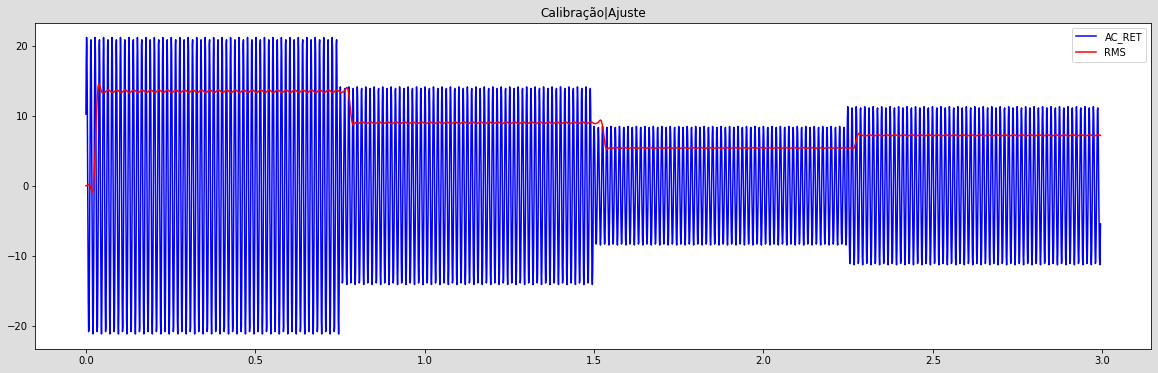

In [ ]:
import matplotlib.pyplot as plt
from math import floor, sqrt
from numpy import cos, sin, pi, absolute, array, arange, size, append, concatenate
from pylab import subplots, figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show, legend
from scipy.signal import firwin, lfilter

# Setup da Simulação
GridFreq = 80 #Nominal Grid Frequency in Hz
Fs       = 1000 #Sampling frequency = 1Khz
Ts       = 1/Fs #Sampling Time = 1/Fs
Tfinal   = 3 #Time the simulation
t        = arange(0,Tfinal,Ts) #Simulation Time vector
w        = 2*pi*GridFreq #Frequencia Angular

# Gera pontos como se estivesse lendo tensões alternadas.
u1,u2,u3,u4 = array([]),array([]),array([]),array([])
for n in range(1,floor(size(t)/4)):
  u1 = append(u1, 15*sqrt(2)*sin(w*(n*Ts)))
  u2 = append(u2, 10*sqrt(2)*sin(w*(n*Ts)))
  u3 = append(u3, 6*sqrt(2)*sin(w*(n*Ts)))
  u4 = append(u4, 8*sqrt(2)*sin(w*(n*Ts)))

supplyVoltage = concatenate((u1, u2, u3, u4))

h = firwin(60, cutoff = 0.1, window = "hamming", pass_zero = "lowpass") # Filtro passa Baixa (fc = 0.01fs)
rmsVoltage = lfilter(h,1,abs(supplyVoltage)) # Aplica o filtro sobre a entrada x resultando em y

VCAL_M = 1; VCAL_B = 0; # Faz o ajuste a partir de uma calibração.
V_RATIO = VCAL_M*rmsVoltage+VCAL_B;

fig, ax = subplots(figsize=(20,6), facecolor='#DEDEDE')
title("Calibração|Ajuste");
line1,line2 = ax.plot(t[:size(supplyVoltage)],supplyVoltage,'b',t[:size(supplyVoltage)],V_RATIO,'r') #linewidth=3
legend([line1,line2],["AC_RET","RMS"]);
#xlabel('Tempo')
#ylabel('Amplitude')

##4	GERAÇÃO DO SINAL ANALÓGICO


###4.1 MONTAGEM REALIZADA

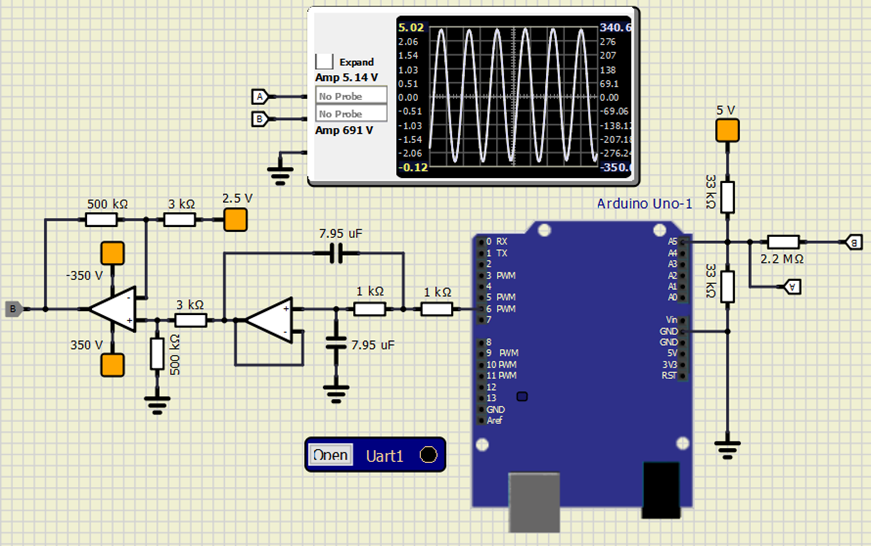

### 4.2.	CÁLCULO DO FILTRO ANALÓGICO

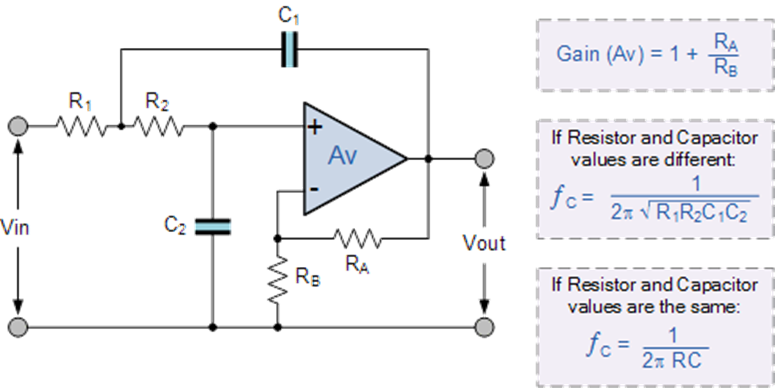

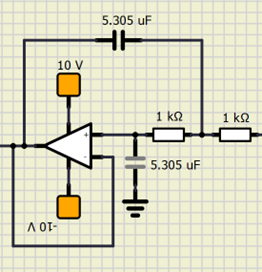

> $Gain=1+\frac{0}{∞}=1$

> $f_C=\frac{1}{2πRC}$

In [ ]:
import math
r = 1000
c = 5.305E-6
fc = 1/(2*math.pi*r*c)
print('Frequência em Hz obtida e:',fc)

Frequência em Hz obtida e: 30.00093177981062


## 4.3 CALCULO DO CONDICIONADOR DA SAÍDA (TOPOLOGIA AMPLIFICADOR SUBTRATOR)

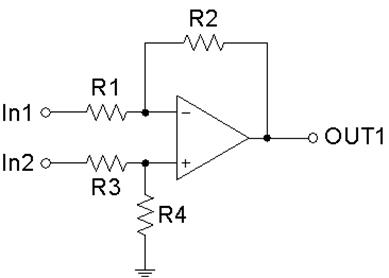

> $R_4$ e $R_2=500k;$

> $R_2$ e $R_1=3k;$

> $V_{out1}=\frac{R_4}{R_3}.V_{in2}-\frac{R_2}{R_1}.V_{in1}=\frac{500k}{3k}.(V_{in2}-2,5)=166,66.(V_{in2}-2,5)$

> $V_{out1}=166,66.\{ \array{5V \\ 0V}-2,5=166,66.\{ \array{+2,5V \\ -2,5V}=\{ \array{+416,66V \\ -416,66V}$

##5 AQUISIÇÃO DO SINAL ANALÓGICO


###5.1 MODELO DE CONDICIONADOR ADOTADO

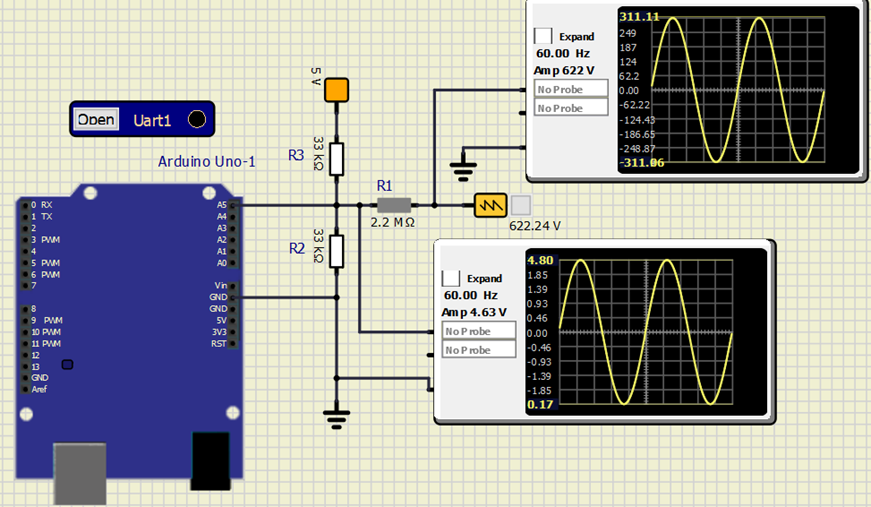

### 5.2 CÁLCULO DO CONDICIONADOR

> $R_1=2,2M$;

> $R_2$  e  $R_3=33K$


#### 5.2.1 Análise CC:

> $V_{0CC}=\frac{(R_2//R_1)}{(R_3+R_2//R_1 )}.V_{CC}=\frac{(33K//2,2M)}{((33K+33K)//2,2M)}.5=2,5V$


#### 5.2.2 Análise CA:

> $V_{0CA}=\frac{(R_3//R_2)}{(R_1+R_3//R_2 )}.V_{CA}=\frac{(33K//33K)}{(2,2M+33K//33K)}.311,12=2,31V$

#### 5.2.3 	SOMATÓRIA DAS ANÁLISES:

> $V_{0r}=V_{0CC}+V_{0CA}=(2,5±2,31)V = \{ \array{4,81V \\ 0V}$


##6 CÓDIGOS DO SISTEMA EMBARCADO (ARDUINO)


###6.1 ESCOLHA DO FILTRO DIGITAL


###6.2 IMPLEMENTAÇÃO DAS THREADS

###6.3 ROTINA DE GERAÇÃO DO SINAL ANALÓGICO

##7 AJUSTE E CALIBRAÇÃO

###7.1 CÓDIGO PARA ENCONTRAR O AJUSTE

In [ ]:
from scipy.stats import t
from scipy.linalg import pinvh as inv
from numpy.linalg import lstsq
from google.colab import drive
import numpy.matlib as mb
import ipywidgets as widgets
import math as mt
import numpy as np
import pandas as pd
import re

def MMQ(y, mx):
  coef = (inv(mx.T @ mx)) @ (mx.T @ y) # Faz a linearização com os dados
  return (coef)

def RMSE(yReal, yEstimado): # root-mean-square deviation
  residuos = np.sum(np.power((yReal - yEstimado),2))**0.5
  return(residuos)

...

##8 CARACTERIZAÇÃO ESTÁTICA

###8.1 CÓDIGO DA CARACTERIZAÇÃO

In [ ]:
from scipy.stats import t
import numpy.matlib as mb
import numpy.linalg as lg
import ipywidgets as widgets
import math as mt
import numpy as np
import pandas as pd
import re

def erroMedicao(VVC, xi):
  n = np.size(xi,0) # n - Tamanho das amostas
  mVVC = mb.repmat(VVC,n,1) # Replica o vetor coluna VVc em n linhas
  em = (xi - mVVC)
  emMaxAbs = np.max(abs(em),0).T
  return (emMaxAbs)

def erroSistematico(VVC, xi):
  vm = np.mean(xi,0) # Média aritmética de cada linha
  return ((vm - VVC).T) # Erro sistemático ou Tendência

def erroAleatorio(xi):
  n = np.size(xi,0) # n - Tamanho das amostas
  mxi = np.mean(xi,0) # Média aritmética
  mxi = mb.repmat(mxi,n,1) # Replica o vetor coluna Vm em n linhas
  ea = (xi - mxi) # Erro aleatótio => Precisão
  eaMaxAbs = np.max(abs(ea),0).T
  return (eaMaxAbs)

def histerese(xiAvanco,xiRecuo):
  vmAvanco = np.mean(xiAvanco,0) # Média aritmética em avanço.
  vmRecuo = np.mean(xiRecuo,0) # Média aritmética em recuo | retorno.
  hist = abs(vmAvanco-vmRecuo)
  histMax = np.max(hist,0)
  return (np.asmatrix(hist).T)

def linearidade(VVC, xi):
  tam = np.size(VVC,1) # Quantidade de valores analisados
  VVC = VVC.T
  vm = np.mean(xi,0).T # Média aritmética de cada linha
  # Calcula a reta com menor erro em relação as medidas - MMQ
  mt = np.concatenate((vm, np.ones((tam,1))),1)
  x = lg.inv(mt.T @ mt)
  y = mt.T @ VVC
  coef = x @ y # Faz a linearização com os dados
  eVVC = coef[0,0]*vm+coef[1,0] # VVC estimado
  el = abs(VVC - eVVC)
  elMax = np.max(el, 0)
  return (el)

def repetitividade(xi):
  return(np.std(np.asmatrix(xi).T,1,ddof=1)) # Calcula o Desvio Padrão

def incertezaPadraoTipoA(st, n): # Incerteza Padrão do Tipo A
  return (np.asmatrix(st/mt.sqrt(n)))

def incertezaPadraoTipoB(uTB,caracteristicasPadrao): #Incerteza Padrão do Tipo B
  desc = uTB[0]
  y = uTB[1]
  tipo = re.search(r"^([^ |\(])+",desc)
  if tipo!=None:
    desc = tipo.group(0)
  if desc == 'Res':
    resp = y/(2*mt.sqrt(3))
  elif tipo[0] == 'Deriva':
    resp = y/mt.sqrt(3)
  elif tipo[0] == 'Lin':
    resp = y/mt.sqrt(3)
    #resp = zeros(size(y,1),1)
  elif tipo[0] == 'Hist':
    resp = y/(2*mt.sqrt(3))
  else: # "Quando for Incerteza - U"
    try:
      resp = y/caracteristicasPadrao['k'] # fatorAbrang
    except:
      resp = y
  return (resp)

def incertezaCombinada(y): # Cálculo da Incerteza Combinada
  return(np.sqrt(np.sum(np.square(y), axis=1)))

def grauLiberdadeEfetivo(uc,uTA,n,uTB,caracteristicasPadrao): # CÁLCULO DO GRAU DE LIBERDADE EFETIVO
  numerador = np.power(uc,4)
  veff = mb.repmat((np.asmatrix(caracteristicasPadrao['veff'])).T,1,np.size(uTB,1))
  va = mb.repmat(np.asmatrix([n-1]),np.size(uTA,0),1) # Grau de Liberdade
  denominador = (np.power(uTA,4)/va)+np.sum(np.power(uTB,4)/veff, axis=1)
  vefF = numerador/denominador # GRAU DE LIBERDADE EFETIVO
  return(vefF)

def fatorAbrangencia(nivelConfianca,veff):
  k=t.ppf(1-((1-nivelConfianca/100)/2),veff)
  return(k)

def incertezaExpandida(uc,k):#Cálculo da Incerteza Expandida
  ue = np.multiply(uc,k);
  return (ue)

def caractEstatico(caracteristicasPadrao, uTB, nivelConfiancaDesejado, VVC, xi, xi_avanco, xi_atraso):
  em = erroMedicao(VVC, xi)
  es = erroSistematico(VVC, xi)
  ea = erroAleatorio(xi)
  rep = repetitividade(xi)
  lin = linearidade(VVC, xi)
  hist = histerese(xi_avanco,xi_atraso)

  uTA_padrao = incertezaPadraoTipoA(rep,np.size(xi,0))
  a = (np.asmatrix(np.array([incertezaPadraoTipoB(x,caracteristicasPadrao) for x in uTB]))).T
  b = incertezaPadraoTipoB(('Lin',lin),caracteristicasPadrao)
  c = incertezaPadraoTipoB(('Hist',hist),caracteristicasPadrao)
  uTB_padrao = np.concatenate((a, b, c), 1)
  uc = incertezaCombinada(np.concatenate((uTA_padrao, uTB_padrao),1))
  veff = grauLiberdadeEfetivo(uc,uTA_padrao,np.size(xi,0),uTB_padrao,caracteristicasPadrao)
  k = fatorAbrangencia((np.asmatrix(nivelConfiancaDesejado)).T,veff)
  ue = incertezaExpandida(uc,k)

  desc = ["EM","ES","EA","Rep","Hist","ELin","uTA (Rep_p)"]+[x[0]+"_p" for x in uTB]+["Lin_p",'Hist_p',"uC","Veff","k","uE"]
  data = np.concatenate((em, es, ea, rep, hist, lin, uTA_padrao, uTB_padrao, uc, veff, k, ue), 1)

  return(pd.DataFrame(data=data, columns=desc))

###8.2 DADOS EXTRAIDOS PARA A CARACTERIZAÇÃO

##9	ANÁLISE DOS RESULTADOS